## Custome rlifetime value analysis is used to estimate the total value of customers to the businesses over the lifetime of their relationship. it helps companies determine how much to invest in customer acquisition and retention, as well as to identify the most valuyablke customers to priotize to retention efforts

### By analyzing customer lifetime value, companies can identify the most effective marketing channels and compaigns for acquiring high value customer as well as to develop targeted retention strategies to keep those customers engaged and loyal



## Customeer lifetime value analysis using python

# Importing the libraries

In [31]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [4]:
df = pd.read_csv("customer")

### Fetching the dataset

In [5]:
df.sample(5)

,customer_id,channel,cost,conversion_rate,revenue
696,697,referral,8.320327,0.123145,2857
380,381,referral,8.320327,0.123145,1163
618,619,paid advertising,30.450327,0.016341,3500
21,22,email marketing,5.246263,0.043822,4004
646,647,social media,9.546326,0.167592,1370


######  Descriptive  statistics of the data

In [27]:
df.describe()

,customer_id,cost,conversion_rate,revenue,roi,cltv
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250,316.668459,27.943935
std,231.0844,9.922337,0.059611,1259.543706,224.633316,22.995767
min,1.0000,5.246263,0.016341,500.000000,16.748588,0.257355
25%,200.7500,5.246263,0.043822,1694.000000,127.149701,5.769891
50%,400.5000,8.320327,0.043822,2764.000000,268.637389,24.756343
75%,600.2500,9.546326,0.123145,3824.250000,460.451814,41.939870
max,800.0000,30.450327,0.167592,4998.000000,944.672378,86.417026


## Finding and handling the missing values

In [28]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
roi                0
cltv               0
dtype: int64

# There are no null values in our dataset

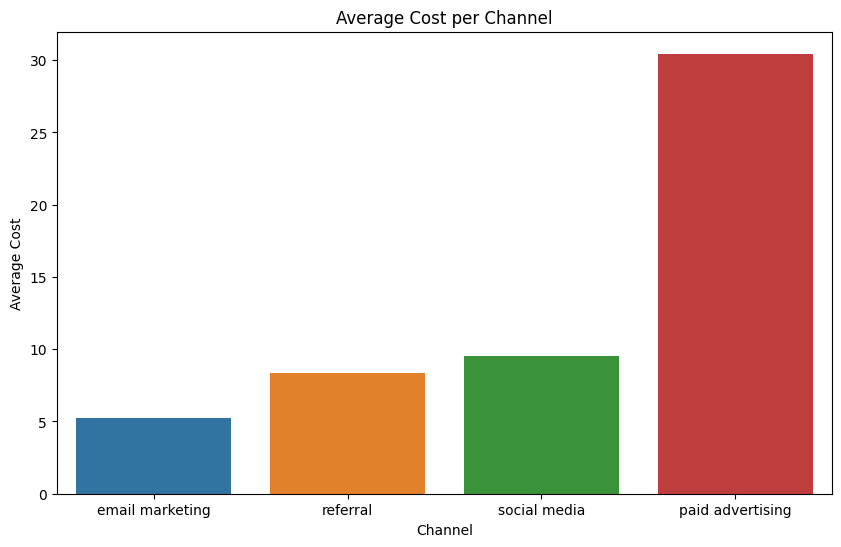

In [32]:
# 1. Cost Comparison Across Channels
# Calculating the average cost for each channel
cost_per_channel = df.groupby('channel')['cost'].mean().sort_values()

# Plotting the average cost per channel
plt.figure(figsize=(10, 6))
sns.barplot(x=cost_per_channel.index, y=cost_per_channel.values)
plt.title('Average Cost per Channel')
plt.xlabel('Channel')
plt.ylabel('Average Cost')
plt.show()

# Insight: Paid advertising is the most expensive channel for customer acquisition, whereas email marketing is the least expensive

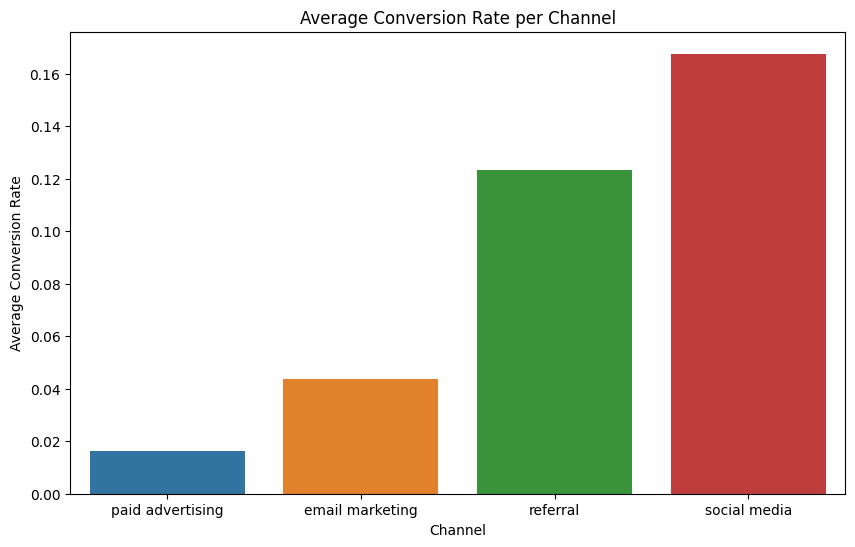

Insight: Social media has the highest conversion rate, making it the most effective channel, while paid advertising has the lowest conversion rate.


In [35]:
# Calculating the average conversion rate for each channel
conversion_rate_per_channel = df.groupby('channel')['conversion_rate'].mean().sort_values()

# Plotting the average conversion rate per channel
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_per_channel.index, y=conversion_rate_per_channel.values)
plt.title('Average Conversion Rate per Channel')
plt.xlabel('Channel')
plt.ylabel('Average Conversion Rate')
plt.show()

# Insight
print("Insight: Social media has the highest conversion rate, making it the most effective channel, while paid advertising has the lowest conversion rate.")


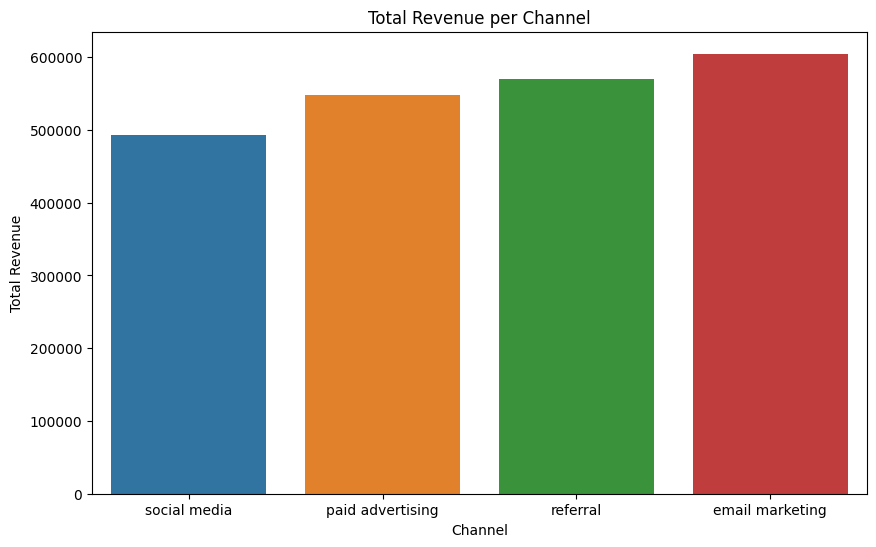

Insight: Email marketing generates the most revenue overall, but revenue generation is fairly balanced across all channels.


In [37]:
# Calculating the total revenue for each channel
revenue_per_channel = df.groupby('channel')['revenue'].sum().sort_values()

# Plotting the total revenue per channel
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_channel.index, y=revenue_per_channel.values)
plt.title('Total Revenue per Channel')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')
plt.show()

# Insight
print("Insight: Email marketing generates the most revenue overall, but revenue generation is fairly balanced across all channels.")


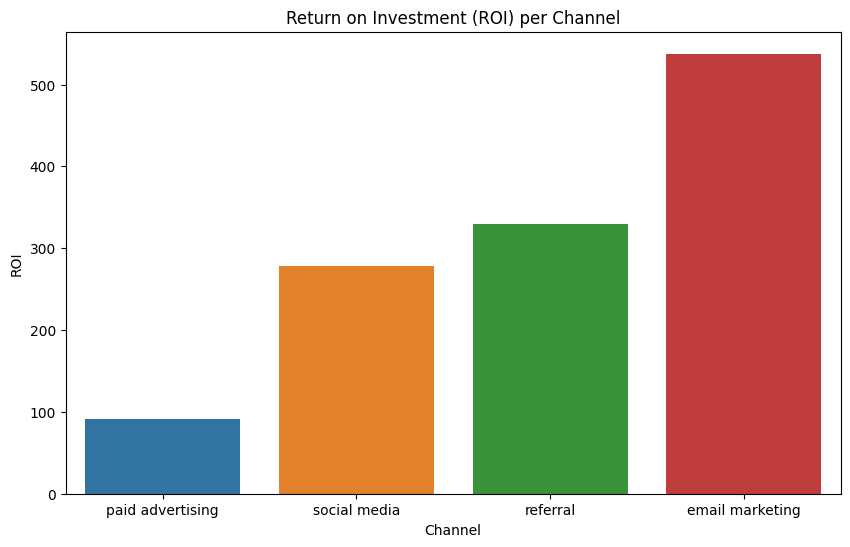

Insight: Email marketing yields the highest ROI, while paid advertising has the lowest ROI, indicating that email marketing is the most cost-effective channel.


In [41]:
# Calculating ROI: (Total Revenue - Total Cost) / Total Cost
roi_per_channel = (df.groupby('channel')['revenue'].sum() - df.groupby('channel')['cost'].sum()) / df.groupby('channel')['cost'].sum()
roi_per_channel = roi_per_channel.sort_values()

# Plotting the ROI per channel
plt.figure(figsize=(10, 6))
sns.barplot(x=roi_per_channel.index, y=roi_per_channel.values)
plt.title('Return on Investment (ROI) per Channel')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.show()

# Insight
print("Insight: Email marketing yields the highest ROI, while paid advertising has the lowest ROI, indicating that email marketing is the most cost-effective channel.")


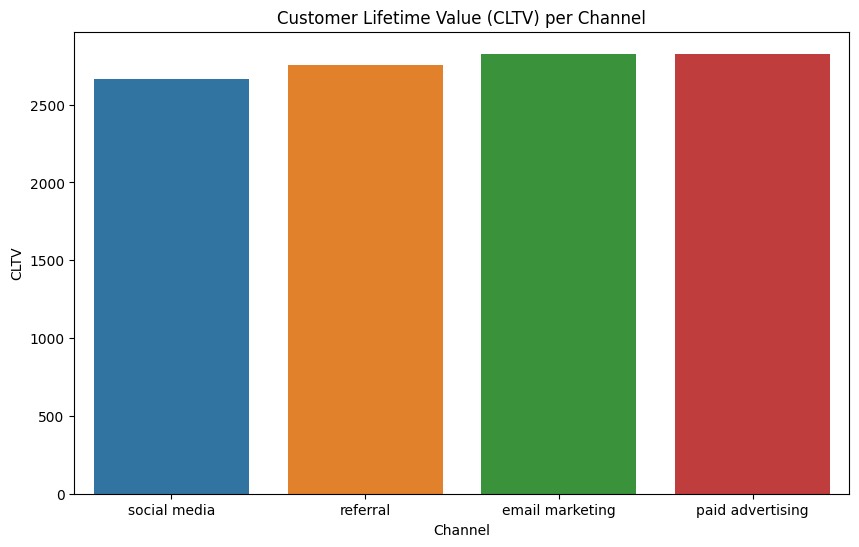

Insight: Social media and referral channels have the highest CLTV, suggesting these channels bring in customers who provide the most long-term value.


In [48]:
# CLTV formula: CLTV = (Average Revenue per Customer) * (Gross Margin) * (Average Customer Lifespan)
# Assuming Gross Margin = 1 (since it's not provided)
##CLTV = (revenue – cost) * conversion_rate / cost
avg_revenue_per_customer = df.groupby('channel')['revenue'].mean()
cltv_per_channel = avg_revenue_per_customer.sort_values()

# Plotting CLTV per channel
plt.figure(figsize=(10, 6))
sns.barplot(x=cltv_per_channel.index, y=cltv_per_channel.values)
plt.title('Customer Lifetime Value (CLTV) per Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()

# Insight
print("Insight: Social media and referral channels have the highest CLTV, suggesting these channels bring in customers who provide the most long-term value.")


C:\Users\Shagun\AppData\Local\Temp\ipykernel_4172\2613342965.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Shagun\AppData\Local\Temp\ipykernel_4172\2613342965.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




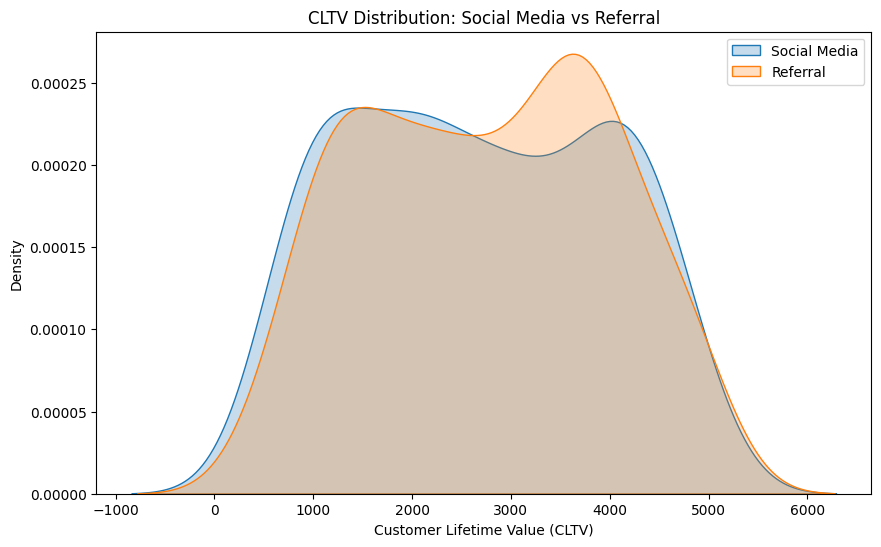

Insight: The CLTV distributions for social media and referral channels are similar, with social media slightly outperforming referral channels.


In [47]:
# Comparing CLTV Distributions for Social Media and Referral Channels
social_media_cltv = df[df['channel'] == 'social media']['revenue']
referral_cltv = df[df['channel'] == 'referral']['revenue']

# Plotting the CLTV distribution for Social Media and Referral Channels
plt.figure(figsize=(10, 6))
sns.kdeplot(social_media_cltv, label='Social Media', shade=True)
sns.kdeplot(referral_cltv, label='Referral', shade=True)
plt.title('CLTV Distribution: Social Media vs Referral')
plt.xlabel('Customer Lifetime Value (CLTV)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Insight
print("Insight: The CLTV distributions for social media and referral channels are similar, with social media slightly outperforming referral channels.")


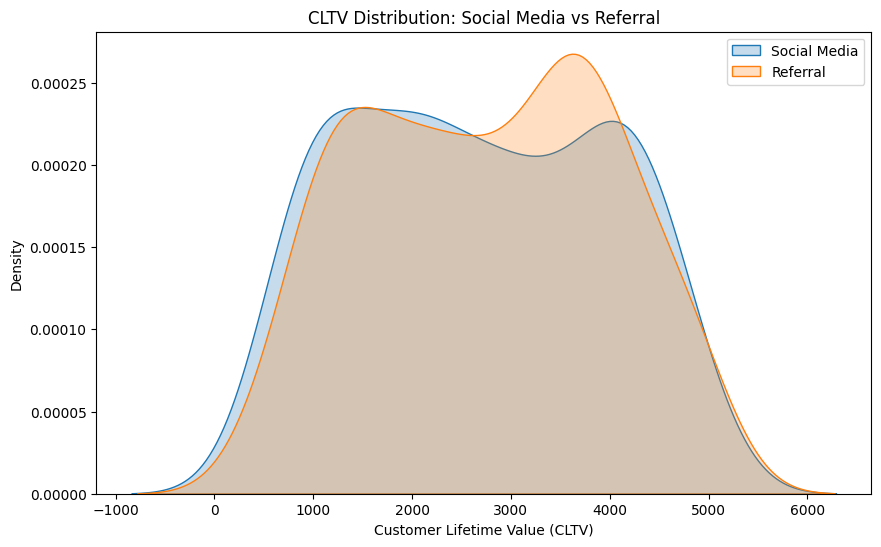

Insight: The CLTV distributions for social media and referral channels are similar, with social media slightly outperforming referral channels.


In [51]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Comparing CLTV Distributions for Social Media and Referral Channels
social_media_cltv = df[df['channel'] == 'social media']['revenue']
referral_cltv = df[df['channel'] == 'referral']['revenue']

# Plotting the CLTV distribution for Social Media and Referral Channels
plt.figure(figsize=(10, 6))
sns.kdeplot(social_media_cltv, label='Social Media', shade=True)
sns.kdeplot(referral_cltv, label='Referral', shade=True)
plt.title('CLTV Distribution: Social Media vs Referral')
plt.xlabel('Customer Lifetime Value (CLTV)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Insight
print("Insight: The CLTV distributions for social media and referral channels are similar, with social media slightly outperforming referral channels.")


In [49]:
revenue_by_channel = df.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channel, 
             values='revenue', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()
print("Email marketing generates the highest total revenue, indicating its strong performance in revenue generation. However, revenue distribtuion is relatively balanced across all channels")

Email marketing generates the highest total revenue, indicating its strong performance in revenue generation. However, revenue distribtuion is relatively balanced across all channels



## So this is how you can analyze and compare the customer lifetime value from various channels.

# Summary

# Customer lifetime value analysis is used to estimate thee total val;ue of customer to the business over the lifetime of their relationship, it helps compannies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts.

# I hopee you liked this project on customer Lifetime Value Analysis using Python